#**Predictive Analysis: Probablity of default**
- This analysis involves a dataset from a lending club in the united states which is a peer to peer lending task.
-The main purpose of this analysis is to help the creditors know prior to giving the loan to a borrower whether they will pay the loan or not incase they are given one by calculating the probaility of default.


##**Installing packages**
- We will install different packages.


1.   **H2O**-which is an open-source ML platform for big-data analysis. It helps when one is using a large dataset in terms of in-memory processing for big dataset.
- We also need a java runtime environment inorder to install h2o.
2.  **New version of pandas profiling**- to help in giving a html report about the dataset structure



In [1]:
## we need java runtime environment inorder to install H2O
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
openjdk version "11.0.9" 2020-10-20
OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)


In [2]:
## Installing h2o
!pip install h2o

     |████████████████████████████████| 129.4MB 95kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=068506414dba17a2c22d80642314cb0de4d13e00c72b80de1067348cf28ff8ac
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o


In [3]:
import h2o
## Initializing h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9" 2020-10-20; OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3k42911y
  JVM stdout: /tmp/tmp3k42911y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3k42911y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    1 month and 14 days
H2O_cluster_name:           H2O_from_python_unknownUser_nn6cp8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.180 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.9 final
--------------------------  ------------------------------------------------------------------

In [4]:
## Installing the new version of pandas profiling V2.9
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 266kB 8.2MB/s 
     |████████████████████████████████| 3.1MB 22.1MB/s 
     |████████████████████████████████| 604kB 38.8MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 112kB 54.4MB/s 
     |████████████████████████████████| 296kB 52.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=531a09e645320d88722758605752c200d38a82d87b9607f74bb25f845c738cf8
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=4197deaaed9ed013fc4f4575ea62b1e66070419033902e1163011afd83b7c31f
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin i

In [5]:
## installing the new version of pandas in colab
!pip install pandas==1.1.3

     |████████████████████████████████| 9.5MB 1.5MB/s 
  Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4


#**Importing libraries**

In [6]:
import pandas as pd ## manipulation of dataframes
import numpy as np

## Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Imports from Scikit learn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder ## helps in encoding categorical variables
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder

import warnings ## Suppress warnings
warnings.filterwarnings('ignore')
import os ## for file system management
import gc ## For memory management

import pandas_profiling
from pandas_profiling import ProfileReport

### h2o AutoML
from h2o.automl import H2OAutoML



In [7]:
# Initialize H2O cluster that we will use when creating the model
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         26 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    1 month and 14 days
H2O_cluster_name:           H2O_from_python_unknownUser_nn6cp8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.180 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.9 final
--------------------------  ------------------------------------------------------------------

In [13]:
# pandas version
pd.__version__

'1.1.4'

In [8]:
pandas_profiling.__version__

'2.9.0'

#**Loading dataset**
- The dataset was obtained from kaggle dataset.
- It is collected from a lending club from years 2007- 2014 and the second one from 2016 to 2017. 
- The first one consists of 466,285 examples and 74 features. 
- The second dataset consists of 759,338 examples and 72 features.
- We will merge the two datasets to form one dataset. 
- The main purpose is to predict the probability of default of a loan by a given loan applicant.

In [8]:
# Code to read csv file into Colaboratory from the google drive:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Loading the first dataset from years 2007-2014.

In [9]:
link = 'https://drive.google.com/open?id=1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx'

In [10]:
fluff, id = link.split('=')

print (id) 

1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx


In [11]:

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1= pd.read_csv('Filename.csv')
print(data1.shape)
data1.head()

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

(466285, 74)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  1077501    1296599       5000  ...     NaN          NaN          NaN
1  1077430    1314167       2500  ...     NaN          NaN          NaN
2  1077175    1313524       2400  ...     NaN          NaN          NaN
3  1076863    1277178      10000  ...     NaN          NaN          NaN
4  1075358    1311748       3000  ...     NaN          NaN          NaN

[5 rows x 74 columns]

### Loading the second dataset from 2016-2017

In [12]:
link = 'https://drive.google.com/open?id=1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G'

In [13]:
fluff, id = link.split('=')

print (id) 

1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G


In [14]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data2 = pd.read_csv('Filename.csv')
print(data2.shape)
data2.head()

(759338, 72)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  112435993        NaN       2300  ...     1.0          0.0          2.0
1  112290210        NaN      16000  ...     0.0          6.0          1.0
2  112436985        NaN       6025  ...     1.0          5.0          3.0
3  112439006        NaN      20400  ...     1.0          1.0          1.0
4  112438929        NaN      13000  ...     0.0          0.0          0.0

[5 rows x 72 columns]

### Merging the two datasets.

In [15]:

### Merge data1 and data2
data=pd.concat([data1,data2])
## The shape of the new data
print(data.shape)
## Viewing the first five observations
data.head() 

(1225623, 74)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  1077501  1296599.0       5000  ...     NaN          NaN          NaN
1  1077430  1314167.0       2500  ...     NaN          NaN          NaN
2  1077175  1313524.0       2400  ...     NaN          NaN          NaN
3  1076863  1277178.0      10000  ...     NaN          NaN          NaN
4  1075358  1311748.0       3000  ...     NaN          NaN          NaN

[5 rows x 74 columns]

#**Exploratory Data Analysis (EDA)**
- Let's first understand how our data looks like by checking the structure of the dataset.
- Then explore the target and later the predictor variables.



In [ ]:

## Checking the columns in the data

print(list(data3.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

##**Checking the structure of the dataset**
- We will use pandas profiling function which gives detailed description of the data as an interactive report and works better compared to the normal describe() function.

In [ ]:
## since the data is large we will use the command minimal to reduce on the time of execution
## This gives the description of the data
profile = ProfileReport(Data, minimal=True)

In [ ]:
## Viewing the summary
profile

##**Summary of the features in the data**
- We have 48 numerical variables, 4 boolean and 20 categorical features.
- The dataset has no duplicates but some features have very high percentage of missing values.
- From our summary we see that remaining outstanding principal amount(out_prncp and out_prncp_inv) and the policy code have a constant value and so they will not be very important in our analysis.
- Some of the features like the employment title has very high cardinality and so we will drop all the features with very high cardinality because it might cause overfitting and redaduncy in our analysis.
- Some of the values have a very high number of missing values and so it will be better if we remove them during data preprocessing.

##**Target variable (loan status)**
- The target variable loan status has 9 categories.

In [ ]:
## The number of examples under each category in the target variable (loan status)
data['loan_status'].value_counts()

Current                                                789749
Fully Paid                                             315457
Charged Off                                             79672
Late (31-120 days)                                      22254
In Grace Period                                          9780
Late (16-30 days)                                        5094
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                   868
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

## The description of the categories under the target variable. 

In [ ]:
pd.set_option('display.max_colwidth', -1) ##allows long text to break for readability purpose

## creating a list of the loan status description
description= [
["current","Loan is up to date on current payments.",789749],
["Fully Paid","Loan has been fully paid off.",315457],
["Charged Off","Loan for which there is no longer a reasonable expectation of further payments.",79672],
["Late (31-120 days)","Loan hasn't been paid in 31 to 120 days (late on the current payment).",22254],
["In Grace Period","The loan is past due but still in the grace period of 15 days.",9780],
["Late (16-30 days)","Loan hasn't been paid in 16 to 30 days (late on the current payment).",5094],
["Does not meet the credit policy. Status:Fully Paid","While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",1988],
["Default","Loan is defaulted on and no payment has been made for more than 121 days.",868],
["Does not meet the credit policy. Status:Charged Off","While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",761]]

## creating a dataframe
loan_status_description = pd.DataFrame(description, columns = ['Type of loan', 'description','count'])

## helps to allign the text in the dataframe on the left
df=loan_status_description.style.set_properties(**{'text-align': 'left'})

## alligning the headers/column names to the left also
df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])



##**Grouping the categories in the loan status**
- We will group the nine classes under the loan status into two categories (good and bad loans)and store them in a new column called Target_variable.
- The current and fully paid will be under the good loans category and the rest will be under bad loans category.

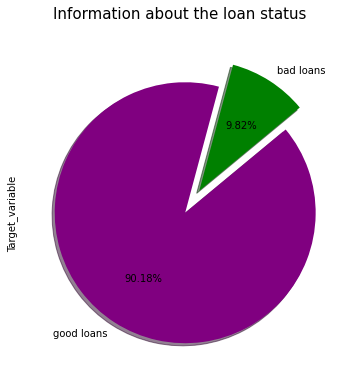

In [16]:
## We group the categories into good and bad loans
defaulted=['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)',
           
           'Does not meet the credit policy. Status:Fully Paid','Default',
           
           'Does not meet the credit policy. Status:Charged Off']

def loan_statuses(status):
  if status in defaulted:
    return 'bad loan'
  else:
    return 'good loan'

## creating a new column target variable
data['Target_variable'] = data['loan_status'].apply(loan_statuses)

## Visualizing the distribution of the bad and good loans in a pie chart

colors = ["purple", "green"]
labels ="good loans", "bad loans"

plt.figure(figsize=(6,6))
plt.suptitle('Information about the loan status', fontsize=15)

data["Target_variable"].value_counts().plot.pie(explode=[0,0.2], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=10, startangle=75)


- We see that the dataset has 9.82% of bad loans and the rest are good loans so we will need to balance the dataset when training the model to avoid overfitting.

##**Multivariate Analysis**

####**$\underline{\text{Loan amount vs funded amount vs amount commited by the investor}}$**
- We first explore the loan applied for by the borrower and the amount that was given by the lender.

Text(0.5, 1.0, 'Total amount committed by investors')

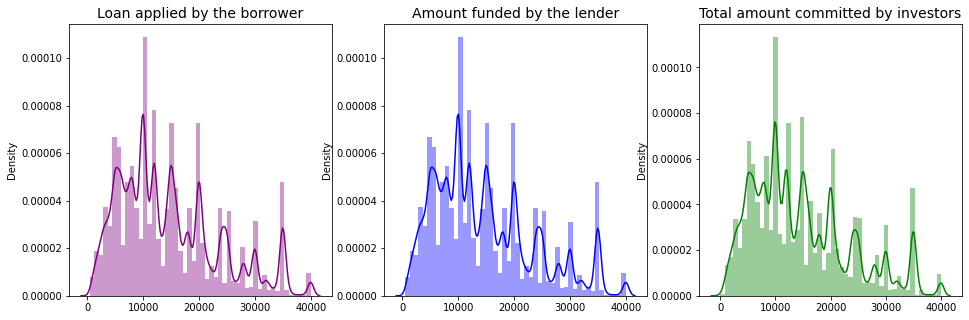

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
loan_amount = data["loan_amnt"].values
funded_amount = data["funded_amnt"].values
investor_funds = data["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="purple")
ax[0].set_title("Loan applied by the borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="blue")
ax[1].set_title("Amount funded by the lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="green")
ax[2].set_title("Total amount committed by investors", fontsize=14)

####**$\underline{\text{Summary on Loan amount and funded amount}}$**
- We notice that the three graphs have almost the same shape meaning that the amount that the borrower applied for, the amount that was funded and the amount that the investor commited to give was the same.
- We will drop the funded_amnt and funded_amnt_inv columns and remain with the loan_amnt to avoid having redundant features.

##**$\underline{\text{Address state vs Loan Status}}$**
- We now explore how the loans were distributed among regions and see which regions are risky when it comes to loan default.
- Since the column address state has high cardinality we will group the states into five groups: west, south west, south east,south west, mid west and north east.

In [17]:
## Group the states into five groups
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

## Define a function that categorises these states into the five groups
def group_states(states):
  if states in west:
    return 'West'
  elif states in south_west:
    return 'Southwest'
  elif states in south_east:
    return 'Southeast'
  elif states in mid_west:
    return 'Midwest'
  else:
    return 'Northeast'

## Creating a new column States
data['States']=data['addr_state'].apply(group_states)

# We have 120,417 loans categorized as bad loans
badloans_data = data.loc[data["Target_variable"] == "bad loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_data['States'], badloans_data['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_data['States'], badloans_data['loan_status'])

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status  Charged Off  Default  ...  Late (31-120 days)  Total
States                             ...                           
Midwest            13404      115  ...                3659  20169
Northeast          18336      201  ...                5476  28639
Southeast          19691      199  ...                5484  29711
Southwest           9199      124  ...                2755  14120
West               19042      229  ...                4880  27778

[5 rows x 8 columns]

- We see that those states in the Southeast, Northeast and West have high numbers of bad loans and so are the most risky parts in the United States that lending companies need to be aware of.

###**$\underline{\text{Address state vs income,loan amount,interest rate and dti }}$**

- Let's now check which state the company have competitive advantage in terms of operating activities so we will look at the risk that the company face and the return they get.
- We will use the number of loans offered and the interest rates charged to those states and then try to understand why in those states the company have advantage in terms of operating activities.  
- We will check the dti ratio and the default ratio to assess the relationship between the risk and the return the company gets from the various states.
- dti=$\frac{\text{total debt payment}}{\text{gross income}}$ so the lower the dti the better.

In [19]:
##We want the total loan amount,average interest offered and average annual income earned in each state

loan_amount = data.groupby(['States','addr_state'], as_index=False).loan_amnt.sum()
interest_rate = data.groupby(['States', 'addr_state'], as_index=False).int_rate.mean()
income = data.groupby(['States', 'addr_state'], as_index=False).annual_inc.mean()
Dti=data.groupby(['States', 'addr_state'], as_index=False).dti.mean()#gives a dataframe of the states and region they fall under and the mean of the dti.
loan_status_bystate = pd.crosstab(data['addr_state'], data['Target_variable'])#gives a table showing the frequency of bad and good loans for each state
loan_status_ratio = loan_status_bystate["bad loan"]/(loan_status_bystate["good loan"]+loan_status_bystate["bad loan"])#gives the ratio of bad to good loans for each state

states = loan_amount['addr_state'].values.tolist()#gives a list of the states
total_loan_amounts = loan_amount['loan_amnt'].values.tolist()#gives a list of the values under the column loan amnt
average_interest_rates = interest_rate['int_rate'].values.tolist()
average_annual_income = income['annual_inc'].values.tolist()
average_debt_to_ratio= Dti['dti'].values.tolist()
default_ratio=loan_status_ratio.values.tolist()

print('The average annual income is:',data['annual_inc'].mean())#gives the overall mean of the annual income
print('The average debt ratio is:',data['dti'].mean())
print('The average default ratio is:',loan_status_ratio.mean())

from collections import OrderedDict

##Renaming the column names
operational_data = OrderedDict([('state_codes', states),
                            ('issued_loans', total_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income),
                            ('default_ratio', default_ratio),
                            ('Debt_to_Ratio', average_debt_to_ratio)])

pd.set_option("display.max_columns", 10)## Setting a maximum of 10 columns                    
## Creating a dataframe and then sorting using the column issued loan
Operational_data = pd.DataFrame.from_dict(operational_data)
Operational_data = Operational_data.round(decimals=2)
df=Operational_data.sort_values('issued_loans',ascending=False)
print(df.head(n=4))



The average annual income is: 77422.44809388618
The average debt ratio is: 18.310243693624486
The average default ratio is: 0.10256658067259793
   state_codes  issued_loans  interest_rate  annual_income  default_ratio  \
41          CA    2544946825          13.33       82726.04           0.10   
39          TX    1536751900          13.34       82069.90           0.09   
18          NY    1487240350          13.58       80401.33           0.11   
26          FL    1194654075          13.52       72606.55           0.09   

    Debt_to_Ratio  
41          16.86  
39          19.33  
18          16.58  
26          18.46  


###**$\underline{\text{Summary on the risk and returns for each state}}$**
- We notice that the first four states that were given the highest loan were California, Texas, New York and Florida and all of them have interest rates of 13%.
- The first three states California, Texas, New York have average income higher than the overall average annual income (77,422) and this could explain the reason why they are given the highest loan.
- If we check the default ratio of the four states,California, Texas, New York and Florida, we see that it is lower than the average default ratio (12%) and we further see that California and New York also have low dti and so these states are very attractive to invest in since the risk are low and the returns are also attractive to the investors.

###**$\underline{\text{Interest rate vs loan status}}$**
- What is the interest rate charged to those loans that end up been bad loans and those that are good loans.

In [ ]:

# Interest rate charged to the loans that end up been good loans
intereston_fully_paid = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Fully Paid'].values), 2)
intereston_current = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Current'].values), 2) 

# Interest rate charged on the loan that end up been bad loans

intereston_default_rates = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Default'].values), 2)
intereston_charged_off = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Charged Off'].values), 2)
intereston_long_fully_paid = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'].values), 2)
intereston_long_charged_off = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values), 2)
intereston_grace_period = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'In Grace Period'].values), 2)
intereston_short_late = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Late (16-30 days)'].values), 2)
intereston_long_late = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Late (31-120 days)'].values), 2)

##Creating a dataframe
df=[intereston_fully_paid,intereston_current,intereston_long_fully_paid,intereston_charged_off,intereston_default_rates,intereston_long_charged_off,
    intereston_grace_period,intereston_short_late,intereston_long_late]
df2=['fully_paid','current','does not meet credit policy:fully paid','charged_off','default','does not meet credit policy:charged off',
'grace_period','Late (16-30 days)','Late (31-120 days)']

Df=pd.DataFrame(df,df2)
Df.columns=['interest_rate(%)']
Df


interest_rate(%)
fully_paid                                          13.22
current                                             13.12
does not meet credit policy:fully paid              13.98
charged_off                                         16.14
default                                             16.11
does not meet credit policy:charged off             14.60
grace_period                                        15.61
Late (16-30 days)                                   15.81
Late (31-120 days)                                  16.12

###$\underline{\text{Summary on the loan status and the interest rate}}$
- The loans that are good loans have an interest rate of 13% and the bad loans are mostly charged an interest rate of 14%-16% except for the loan that does not meet the credit policy at the moment and so it will be a bad loan if it was to be given right now even though it was paid in full back then.

####**$\underline{\text{Purpose of the loan vs default ratio }}$**
- Among the purpose that the applicant applies the loan for, which one has the highest default ratio. 

In [ ]:
loan_purpose = data.groupby(['purpose'],as_index=False).sum()## 
loan_status_bypurpose = pd.crosstab(data['purpose'], data['Target_variable'])#gives a table showing the frequency of bad and good loans for the purpose of the loan
total_loanby_purpose = loan_status_bypurpose["bad loan"]+loan_status_bypurpose["good loan"] ## Gives the total loan given under each purpose
loan_status_ration = loan_status_bypurpose["bad loan"]/(loan_status_bypurpose["good loan"]+loan_status_bypurpose["bad loan"])#gives the ratio of bad to good loans for the purpose

purpose = loan_purpose['purpose'].values.tolist()#gives a list of the purpose of the loan
total_loan=total_loanby_purpose.values.tolist()# a list of the total under each loan purpose
default_ration=loan_status_ration.values.tolist()# The default ratio for the different purpose of the loan

##Gives a continous list of the three categories
purpose_data = OrderedDict([('purpose', purpose),('Total_loan',total_loan),
                            ('default_ratio', default_ration)])
                  
## Creating a dataframe and then sorting using the column issued loan
Purpose_data = pd.DataFrame.from_dict(purpose_data)
Purpose_data = Purpose_data.round(decimals=2)
Purpose_data


purpose  Total_loan  default_ratio
0                  car       14174           0.08
1          credit_card      261925           0.08
2   debt_consolidation      705725           0.10
3          educational         422           0.36
4     home_improvement       83734           0.09
5                house        5830           0.13
6       major_purchase       28147           0.09
7              medical       14962           0.11
8               moving        8967           0.13
9                other       74370           0.11
10    renewable_energy         870           0.14
11      small_business       15248           0.18
12            vacation        8903           0.09
13             wedding        2346           0.14

###$\underline{\text{Summary on the purpose of the loan and the default ratio}}$
- We see that those loans applied for the educational and small business purposes have high percentage of default of 36% and 18% respectively. 
- Most of the loans were applied for the purpose of debt consolidation and credit card and they both had low default rate compared to educational loans that were few and yet had the highest rate of default.

####**$\underline{\text{Grade vs loan amount vs interest rate vs default ratio }}$**
- Check how the interest rates and default rate differ across the grades.
- Also check how the loan amount is funded across the grades.

In [ ]:
##We want the total loan amount,average interest offered and average annual income earned in each state

loan_amount = data.groupby(['grade'], as_index=False).loan_amnt.sum()
interest_rate = data.groupby(['grade'], as_index=False).int_rate.mean()
loan_status_bystate = pd.crosstab(data['grade'], data['Target_variable'])#gives a table showing the frequency of bad and good loans for the grade
loan_status_ratio = loan_status_bystate["bad loan"]/(loan_status_bystate["good loan"]+loan_status_bystate["bad loan"])#gives the ratio of bad to good loans for each grade

grades = loan_amount['grade'].values.tolist()#gives a list of the grade
total_loan_amounts = loan_amount['loan_amnt'].values.tolist()#gives a list of the values under the column loan amnt
average_interest_rates = interest_rate['int_rate'].values.tolist()
Default_Ratio=loan_status_ratio.values.tolist()

from collections import OrderedDict

##Renaming the column names
creditscore_data = OrderedDict([('Grade', grades),
                            ('issued_loans', total_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('Default_Ratio', Default_Ratio)])

pd.set_option("display.max_columns", 10)## Setting a maximum of 10 columns                    
## Creating a dataframe and then sorting using the column issued loan
Creditscore_data = pd.DataFrame.from_dict(creditscore_data)
Creditscore_data =Creditscore_data.round(decimals=2)
Creditscore_data

Grade  issued_loans  interest_rate  Default_Ratio
0     A    2748992475           7.16           0.03
1     B    4883708875          10.80           0.07
2     C    5440832675          14.22           0.10
3     D    2721481825          18.04           0.16
4     E    1351943200          21.98           0.21
5     F     517139100          25.46           0.27
6     G     180006275          28.03           0.28

####**$\underline{\text{Summary of the grade vs loan amount vs interest rate vs default ratio }}$**
- As we would expect the interest rate increases and so does the default ratio.
- Most loans are offered to the people in grade C.

####**$\underline{\text{Home ownership vs default ratio }}$**

In [ ]:
home_ownership = data.groupby(['home_ownership'],as_index=False).sum()## 
loan_status_byhome = pd.crosstab(data['home_ownership'], data['Target_variable'])#gives a table showing the frequency of bad and good loans under each category of home ownership
total_loanby_home = loan_status_byhome["bad loan"]+loan_status_byhome["good loan"] ## Gives the total loan given under each type of home ownership
loan_status_Ratio = loan_status_byhome["bad loan"]/total_loanby_home

homeownership = home_ownership['home_ownership'].values.tolist()#gives a list of the categories of the home ownership type of the loan applicants
total_loan=total_loanby_home.values.tolist()# a list of the total loan under each home ownership category
Default_ratio=loan_status_Ratio.values.tolist()# The default ratio for the different categories under the home ownership of the loan applicant

##Gives a continous list of the three categories
home_data = OrderedDict([('Home_ownership', homeownership),('Total_loan',total_loan),
                            ('default_ratio', Default_ratio)])
                  
## Creating a dataframe and then sorting using the column issued loan
home_ownership_data = pd.DataFrame.from_dict(home_data)
home_ownership_data = home_ownership_data.round(decimals=2)
home_ownership_data

Home_ownership  Total_loan  default_ratio
0            ANY         505           0.06
1       MORTGAGE      607454           0.09
2           NONE          54           0.22
3          OTHER         182           0.36
4            OWN      131855           0.10
5           RENT      485573           0.11

####**$\underline{\text{Summary of the home ownership vs default ratio}}$**
- Most loans were applied by applicants who were paying for mortgage and rent.

#**Preparing the data**
- Check all the columns that have missing and remove all those with 70% missing values.
- Remove all the redundant columns that are not available during loan application.

In [18]:
## Dropping all the columns that have 70% missing values
data.dropna(thresh = data.shape[0]*0.7, how = 'all', axis = 'columns', inplace = True)
print(data.shape)

(1225623, 52)


In [25]:
### Checking the 52 columns remaining 
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'Target_variable', 'States'],
      dtype='object')

We are going to remove all those features that are available once one has been given the loan and so they are not important during loan application.

In [19]:
#drop all unnecessary columns/redundant columns

data.drop(columns = ['id', 'funded_amnt', 'funded_amnt_inv','sub_grade', 'emp_title', 'emp_length',
                     'loan_status', 'pymnt_plan','title', 'zip_code','addr_state','delinq_2yrs', 
                     'earliest_cr_line','inq_last_6mths','pub_rec', 'revol_bal', 'revol_util',
                     'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                     'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                     'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                    'collections_12_mths_ex_med', 'policy_code','application_type', 'acc_now_delinq',
                     'tot_coll_amt', 'total_rev_hi_lim' ,'tot_cur_bal','issue_d'
                     ], inplace = True)
print(data.shape)

(1225623, 15)


##**Creating the model**
- We will use **automl** to create the models where the h2o performs the preprocessing such as label encoding and one-hot encoding to the categorical variables, filling the missing values and standardizing the numerical variables and also hyperparameter tuning and then creates the models for us.
- We will first convert the pandas dataframe into h2o frame.
- Split the data into training, validation and testing set.
- We will set the model number to be 10 models and exclude both the deep learning and the stacked ensemble models.
- We will set a cross validation of zero(0) folds since we will have a validation set when splitting the data so we don't need any cross validation.

In [20]:
## Converting the pandas dataframe into h2o frame
data = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
## The first ten observations
data.head() 

loan_amnt term int_rate installment grade home_ownership annual_inc verification_status purpose dti open_acc total_acc initial_list_status Target_variable States 
 
 
 5000 36 months 10.65 162.87 B RENT 24000 Verified credit_card 27.65 3 9 f good loan Southwest 
 2500 60 months 15.27 59.83 C RENT 30000 Source Verified car 1 3 4 f bad loan Southeast 
 2400 36 months 15.96 84.33 C RENT 12252 Not Verified small_business 8.72 2 10 f good loan Midwest 
 10000 36 months 13.49 339.31 C RENT 49200 Source Verified other 20 10 37 f good loan West 
 3000 60 months 12.69 67.79 B RENT 80000 Source Verified other 17.94 15 38 f good loan West 
 5000 36 months 7.9 156.46 A RENT 36000 Source Verified wedding 11.2 9 12 f good loan Southwest 
 7000 60 months 15.96 170.08 C RENT 47004 Not Verified debt_consolidation 23.51 7 11 f good loan Southeast 
 3000 36 months 18.64 109.43 E RENT 48000 Source Verified car 5.35 4 4 f good loan West 
 5600 60 months 21.28 152.39 F OWN 40000 Source Verified small_business 5.55 11 13 f bad loan West 
 5375 60 months 12.69 121.45 B RENT 15000 Verified other 18.08 2 3 f bad loan Southwest

In [31]:
##Checking the type of the variables
data.types 

{'States': 'enum',
 'Target_variable': 'enum',
 'annual_inc': 'real',
 'dti': 'real',
 'grade': 'enum',
 'home_ownership': 'enum',
 'initial_list_status': 'enum',
 'installment': 'real',
 'int_rate': 'real',
 'loan_amnt': 'int',
 'open_acc': 'int',
 'purpose': 'enum',
 'term': 'enum',
 'total_acc': 'int',
 'verification_status': 'enum'}

In [33]:
##Lets check the data description in the h2o frame
data.describe()

Rows:1225623
Cols:15




loan_amnt term int_rate installment grade home_ownership annual_inc verification_status purpose dti open_acc total_acc initial_list_status Target_variable States 
 
 
 type int enum real real enum enum real enum enum real int int enum enum enum 
 mins 500.0 5.32 15.67 0.0 -1.0 0.0 1.0 
 mean 14559.211458172704 13.431362099112038 438.58102483390076 77422.44809388556 18.310243693624585 11.580713515242413 24.48970539999383 
 maxs 40000.0 30.99 1719.83 110000000.0 999.0 97.0 176.0 
 sigma 8875.531163448544 4.811285764872738 263.98290443467425 133058.49105400094 11.61075858905208 5.4952982176983145 11.830249688122697 
 zeros 0 0 0 338 643 11 0 
 missing 0 0 0 0 0 0 4 0 0 355 29 29 0 0 0 
 0 5000.0 36 months 10.65 162.87 B RENT 24000.0 Verified credit_card 27.65 3.0 9.0 f good loan Southwest 
 1 2500.0 60 months 15.27 59.83 C RENT 30000.0 Source Verified car 1.0 3.0 4.0 f bad loan Southeast 
 2 2400.0 36 months 15.96 84.33 C RENT 12252.0 Not Verified small_business 8.72 2.0 10.0 f good loan Midwest 
 3 10000.0 36 months 13.49 339.31 C RENT 49200.0 Source Verified other 20.0 10.0 37.0 f good loan West 
 4 3000.0 60 months 12.69 67.79 B RENT 80000.0 Source Verified other 17.94 15.0 38.0 f good loan West 
 5 5000.0 36 months 7.9 156.46 A RENT 36000.0 Source Verified wedding 11.2 9.0 12.0 f good loan Southwest 
 6 7000.0 60 months 15.96 170.08 C RENT 47004.0 Not Verified debt_consolidation 23.51 7.0 11.0 f good loan Southeast 
 7 3000.0 36 months 18.64 109.43 E RENT 48000.0 Source Verified car 5.35 4.0 4.0 f good loan West 
 8 5600.0 60 months 21.28 152.39 F OWN 40000.0 Source Verified small_business 5.55 11.0 13.0 f bad loan West 
 9 5375.0 60 months 12.69 121.45 B RENT 15000.0 Verified other 18.08 2.0 3.0 f bad loan Southwest

###Data splitting

In [21]:
##We now split the data into training,validation and testing data
data_train,data_test,data_valid = data.split_frame(ratios=[.7, .15])

In [22]:
## separating the predictor variables and the target variable
y = "Target_variable"
x = data.columns
x.remove(y)

In [23]:
## We now use automl and create 5 models excluding the stacked ensemble and deep learning mpdels
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], 
                verbosity="info", nfolds=0)

### Fitting the model

In [24]:
## Fitting the models
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)

AutoML progress: |
04:40:21.311: Project: AutoML_20201112_44021308
04:40:21.312: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:40:21.312: Setting stopping tolerance adaptively based on the training frame: 0.0010797316681958567
04:40:21.312: Build control seed: 10
04:40:21.313: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
04:40:23.547: training frame: Frame key: automl_training_py_2_sid_aec8    cols: 15    rows: 771912  chunks: 38    size: 28028369  checksum: 8489800358369026292
04:40:23.547: validation frame: Frame key: py_4_sid_aec8    cols: 15    rows: 184011  chunks: 38    size: 4298075  checksum: 8977803846541884048
04:40:23.587: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_aec8    cols: 15    rows: 85853  chunks: 38    size: 3263044  checksum: -4961354681961076016
04:40:23.587: blending frame: NULL
04:40:23.587: response co

###Model performance
- We have used the following models:


1.   **XG Boost**
2.   **Gradient Boosting(GBM)**
3.   **Distributed Random Forest(DRF)**
4.   **Generalized Linear model(GLM)**



In [25]:
## Assigning the model performance
leader_board = aml.leaderboard

In [26]:
## Model performance
leader_board.head()

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 XGBoost_3_AutoML_20201111_170558 0.723371 0.289036 0.957441 0.492912 0.286123 0.0818664 
 GBM_4_AutoML_20201111_170558 0.722871 0.289633 0.957459 0.497172 0.286501 0.0820831 
 GBM_3_AutoML_20201111_170558 0.720913 0.289968 0.95691 0.496925 0.286415 0.0820335 
 GBM_5_AutoML_20201111_170558 0.720655 0.290195 0.957035 0.49732 0.286799 0.0822537 
 GBM_2_AutoML_20201111_170558 0.718206 0.290661 0.956223 0.497313 0.286615 0.0821481 
 GBM_1_AutoML_20201111_170558 0.716614 0.290918 0.955973 0.497588 0.28664 0.0821625 
 XGBoost_1_AutoML_20201111_170558 0.716005 0.291716 0.956147 0.494762 0.28739 0.082593 
 DRF_1_AutoML_20201111_170558 0.697853 0.296376 0.951929 0.497139 0.288726 0.0833627 
 XGBoost_2_AutoML_20201111_170558 0.694234 0.301405 0.952278 0.498041 0.291464 0.0849513 
 GLM_1_AutoML_20201111_170558 0.686382 0.298557 0.949012 0.499652 0.289486 0.0838024

##**$\underline{\text{Interpretation of the results}}$**
- The evaluation metrics that we will use are accuracy, area under the curve precision recall (aucpr) and log loss. We will not use rmse and mse since the two assumes that the data follows a normal distribution which is not true since we are dealing with a binary classification and so it follows a bernoulli distribution.
- Among the 10 models XG boost works better in the training and validation set with an accuracy of 72.3% and a log loss of 29% meaning that we are 29% uncertain about the classification and the model separates the good and bad loans correctly with a probability of 95%.
- The second best model is the gradient boosting model(GBM).
- The next thing we do is now test the model in a new data and check how it works.

In [25]:
## Making prediction on a new data using 
data_prediction=aml.leader.predict(data_test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [28]:
## Viewing the first 10 outcome on the prediction on a new data using xgboost
data_prediction.head()

predict bad loan good loan 
 
 
 good loan 0.205988 0.794012 
 good loan 0.0852876 0.914712 
 good loan 0.0386816 0.961318 
 good loan 0.228514 0.771486 
 good loan 0.0357687 0.964231 
 good loan 0.0934413 0.906559 
 good loan 0.109068 0.890932 
 good loan 0.313579 0.686421 
 good loan 0.111303 0.888697 
 good loan 0.211612 0.788388

###**Testing the performance of the model on a new data using the leader board (XG Boost)**

In [26]:
## Testing the performance of the model on new data
aml.leader.model_performance(data_test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.08247865538123977
RMSE: 0.2871909737112916
LogLoss: 0.2897674445928253
Mean Per-Class Error: 0.3297834380714664
AUC: 0.7307412743083449
AUCPR: 0.9584525606441154
Gini: 0.4614825486166898

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41530920192599297: 


bad loan  good loan   Error                 Rate
0   bad loan     133.0    17914.0  0.9926    (17914.0/18047.0)
1  good loan      28.0   165772.0  0.0002      (28.0/165800.0)
2      Total     161.0   183686.0  0.0976   (17942.0/183847.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.415309       0.948662  372.0
1                        max f2   0.251451       0.978750  385.0
2                  max f0point5   0.741779       0.922413  288.0
3                  max accuracy   0.520529       0.902424  360.0
4                 max precision   0.995024       1.000000    0.0
5                    max recall   0.045924       1.000000  399.0
6               max specificity   0.995024       1.000000    0.0
7              max absolute_mcc   0.873906       0.212004  169.0
8    max min_per_class_accuracy   0.893185       0.668221  145.0
9   max mean_per_class_accuracy   0.905735       0.670217  129.0
10                      max tns   0.995024   18047.000000    0.0
11                      max fns   0.995024  165714.000000    0.0
12                      max fps   0.045924   18047.000000  399.0
13                      max tps   0.045924  165800.000000  399.0
14                      max tnr   0.995024       1.000000    0.0
15                      max fnr   0.995024       0.999481    0.0
16                      max fpr   0.045924       1.000000  399.0
17                      max tpr   0.045924       1.000000  399.0


Gains/Lift Table: Avg response rate: 90.18 %, avg score: 90.19 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        10.040653            0.010231
1       2                  0.020000  ...         9.980111            0.020334
2       3                  0.030003  ...         9.879681            0.030197
3       4                  0.040001  ...         9.844408            0.040115
4       5                  0.050004  ...         9.811294            0.049978
5       6                  0.100002  ...         9.298578            0.094727
6       7                  0.150000  ...         8.946719            0.136712
7       8                  0.200009  ...         8.677418            0.176804
8       9                  0.299999  ...         7.967626            0.243501
9      10                  0.400001  ...         7.247899            0.295342
10     11                  0.500003  ...         6.451773            0.328627
11     12                  0.599999  ...         5.529946            0.338005
12     13                  0.700001  ...         4.563076            0.325393
13     14                  0.799997  ...         3.417189            0.278489
14     15                  0.899998  ...         2.032084            0.186309
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

##**Summary on the performance of test data using XG Boost**
- We see that the model predicts on a new dataset with an accuracy of 73% and an AUCPR of 95% meaning that it can separate the two classes 95% correctly. The log loss of 29% means that we are 29% uncertain of the classification made by the model.
- This means that XG Boost is performing relatively well and we can now check how it predicts the probability of default(PD)

##**Performance of gradient boosting model (GBM) on a new data**